In [1]:
import numpy as np
import scipy.linalg as spla
import scipy.sparse as sps
import matplotlib.pyplot as plt
import os
import math
import cmath
from sympy import *
import control as ct
from control.matlab import *
import scipy.integrate as integrate
from scipy.integrate import quad
from numpy.linalg import eig, svd, det
from scipy.integrate import solve_ivp

In [2]:
#Simboli
#m, k, h, x1, x2, u = symbols('m k h x1 x2 u')

In [3]:
#izracunavanje Jacobian matrice
#A = f.jacobian(X)
#matrica A gdje spremamo rezultat, f funkcija po kojoj se radi Jacobian i X po kojim varijablama

In [4]:
#substitucija varijable za broj
# A.subs(varijabla, vrijednost)
# A.subs([(varijabla, vrijednost), (varijabla, vrijednost)])

In [5]:
#izrada funkcije prijenosa
#zadamo 
#simbol s = symbols('s')
#tr_fun = po formli C * (sI - A)^(-1) * B + D
#ispisemo

In [6]:
#zadavanje sustava realizacijom
#ss = state space
#sustav = ct.ss(A, B, C, D)
#damo matrice po formuli kako idu 
# x' = Ax + Bu
# y = Cx + Du

In [7]:
#ako imamo sustav mozemo i funkciju prijenosa napraviti
# tf = transfer function od sustava (ovdje funkcije je normalizirana pa moze drukcije izgledati)
# tr_fun2 = ct.tf(sustav)

In [14]:
# postoji napredbe simplify(izraz)
# da nam pojednostavi nekad izraze

In [8]:
#matrica eksp funkcija
# t = symbols('t')
# napravimo matricu tA = t * A
#svakom se elementu doda t parametar
# tA.exp() daje matricnu e^(tA)

In [9]:
#Jordanova forma (korisno)
# A se moze napisati kao A = P * J * P^-1
# gdje je J Jordanova forma matrice A
# P, J = A.jordan_form()
# tJ = t * J
# (P) * Jt.exp() * (P **(-1)) # e^tA

In [10]:
#inverzna laplaceova transformacija
#uzmemo A izracunamo (sI - A)^-1 i po toj matrici radimo inverznu laplaceovu transformaciju

#def invL(F):
#    return inverse_laplace_transform(Matrix((s * eye(F.shape[0]) - F) ** (-1)), s, t)
#zadnja dva parametra govore iz koje u koju varijablu idemo
#iz s varijable prelazimo na t jer je onaj intergal po t

In [17]:
#stabilnost i rjesenje sustava
#stabilnost
#3 slucaja
#stabilan = svi realni dijelovi svih nultocaka sv polinoma su < 0 
#rubno stabilan = ako imamo koju nultocku koja je 0 onda gledamo njenu kratnost (koliko se puta pojavljuje)
#                 ako je kratnost = 1 odnosno pojavljuje se 1 onda je sustav rubno stabilan 
#nestabilan = ako imamo barem 1 nultocku ciji realni dio je > 0 odmah je nestabilan
#             ako je nultocka 0 kratnost > 1 onda je odmah nestabilan isto
#stabilnost sustava mozemo lako dobiti/iscitati 
#1. nacin iz matrice J 
#2. nacin preko sv vrijednosti
#3. nacin preko Lyapunovljeve jednadzbe
#2. A.eigenvals() = ispisuje matricu sv vrijednosti odnosno nultockaa polinoma
#napraviti matricu P simetricnu -> sustav je stabilan jer postoji takva marica koja je poz. definitina
#Teorem 2.1. Matrica A je pozitivno definitna ako i samo ako su joj sve svojstvene vrijednosti
#pozitivne. (naso na mathos zavrsnom radu nekom loool)
#P = Matrix(lyap(Transpose(A), eye(4))) izracunamo P
#eye 4 je jedinicna matrica 4x4 ubiti trebalo bi ici A.shape[0] za opcenito
# P.eigenvals() i tjt
#iscitamo
#matrica P ima svojstva A.T * P + P * A = I

In [13]:
#rjesenje sustava
#zadamo rjesenje x0 i u koji nam moraju biti dani
#generiramo vremenski interval
#pogledamo za svaki t iz intervala rjesenje i gledamo ponasanje grafa
#pr
# x0 = [10, 0]
# u = 0.5
# tt = np.arrange(0, 140, 0.1) generira t-ove 0-140 sa razmakom 0.1 
# kako bi dobili za plotanje
# T, yout = ct.forced_response(sutav, vrijeme, ulaz, pocetni uvjet)
# T, yout = ct.forced_response(sys, tt, u, x0)
#plotanje
# plt.plot(T.T, yout.T)
# stabilni sustavi "konvergiraju" ka nekoj vrijednosti konacnoj
# nestabilni ne konkvergiraju oni eksplodiraju
# rubno stabilni oni imaju ponasanje poput amplitude zovu se rubno stabilni jer
# mozemo ih "ograniciti" u smislu visine amplitude ali oni se ne izravnaju nikad tj ne kvg

In [19]:
#upravljivost sustava
# ako zelimo provjeriti je li sustav upravljiv
# moramo napraviti control maxtrix i njoj izracunati rang
# za control matrix potrebne su nam A i B matrice
# Cm = ct.ctrb(A, B)
# najlaksa provjera upravljivosti preko SVD dekompozicije
# svd => singluar value decomposition
# U * sigma * V.T = Cm
# U, sigma, Vt = svd(Cm)
# odavdje samo uzmemo sigma
# i provjerimo koliko vrijednosti ima treba ih biti n 
# ako ih je manje onda matrica nije punog ranga odnosno uvijek ce ih biti n 
#bitno je da nisu 0
#kako to detektirati
#mozemo isprintati sigma pa gledati, no najbolje je 
#plt.semilogy(sigma) plotati tocke i ako uopcimo da negdje imamo znacajan pad onda znamo da je ta vrijednost 0 
#a nije neki mali broj
# ako je matrica upravljivosti punog ranga onda je upravljiv sustav

In [201]:
#od funkcije prijenosa do sustava
# dobijemo funkciju prijenosa 
#razdvojimo na brojnik i nazivnik
# i napravimo matrice brojnika i nazivnika
#odnosno koef pisemo u matrice redom
#pogledati vjezbe7 zadnji primjer
#pozvati tf i da ju dobijemo
# i ako ct.ss pozovemo na funkciji prijenosa dobijemo state space sustav
#poz
s = symbols('s')
gg = [1, 7, 4, 8]
dd = [1, 6, 1, 6]
tf_fun = ct.tf(gg, dd)
tf_fun

sys1 = ct.ss(tf_fun)
sys1
A = Matrix([[-6, -1, -6], 
            [1, 0, 0],
            [0, 1, 0]])
P, J = A.jordan_form()
J


Matrix([
[-6,  0, 0],
[ 0, -I, 0],
[ 0,  0, I]])

In [44]:
m, c = symbols('m c')

A = Matrix([[0, 1],
            [1 / m, -c / m]])

B = Matrix([[0],
           [1 / m]])

C = Matrix([[1, 0]])

In [47]:
A1 = A.subs([(m, 2), (c, 2)])
B1 = B.subs(m, 2)

In [50]:
zad1_ss = ct.ss(A1, B1, C, D)
zad1_tf = ct.tf(zad1_ss)
zad1_tf

TransferFunction(array([0.5]), array([ 1. ,  1. , -0.5]))

In [65]:
A = Matrix([[3, 1, 2], 
            [0, 1, 2],
            [0, 0, 2]])
B = Matrix([[1],
            [-1],
            [0]])
C = Matrix([[1, 1, 0]])
D = 0

sys = ct.ss(A, B, C, D)
tf_sys = ct.tf(sys)
s = symbols('s')

simplify(C * ((s * eye(3) - A) ** (-1)) * B)

Matrix([[1/(s**2 - 4*s + 3)]])

In [66]:
A = Matrix([[3, 1, 2], 
            [0, 1, 2],
            [0, 0, -2]])
B = Matrix([[1],
            [-1],
            [0]])
C = Matrix([[1, 1, 0]])
D = 0

sys = ct.ss(A, B, C, D)
tf_sys = ct.tf(sys)
s = symbols('s')

simplify(C * ((s * eye(3) - A) ** (-1)) * B)

Matrix([[1/(s**2 - 4*s + 3)]])

In [72]:
A = Matrix([[1, -1], 
            [2, -2]])
t = symbols('t')
(t * A).exp()

Matrix([
[  2 - exp(-t),   -1 + exp(-t)],
[2 - 2*exp(-t), -1 + 2*exp(-t)]])

In [77]:
#Sustav
A = Matrix([[-1, -2, 2], 
            [-1 , -3, 2],
            [-2, -4, 3]])
B = Matrix([[0 ,  0],
            [-1, 1],
            [-1, 1]])
C = Matrix([[1, 1, 0],
            [0, 1, 1]])
D = 0

In [127]:
#Sustav
A = Matrix([[-1, -2, 2], 
            [-1, -3, 2],
            [-2, -4, 3]])
B = Matrix([[0, 0],
            [-1, 1],
            [-1, 1]])

C = Matrix([[1, 1, 0],
            [0, 1, 1]])
D = 0

In [128]:
#a - funkcija prijenosa
sys = ct.ss(A, B, C, D)
sys
s = symbols('s')

simplify(C * ((s * eye(3) - A) ** (-1)) * B)

Matrix([
[-1/(s + 1), 1/(s + 1)],
[-2/(s + 1), 2/(s + 1)]])

In [129]:
#b - stabilnost sustava
P, J = A.jordan_form()
print(A.eigenvals())
J
#ovako zadan sustav je rubno stabilan

{-1: 1, -I: 1, I: 1}


Matrix([
[-1,  0, 0],
[ 0, -I, 0],
[ 0,  0, I]])

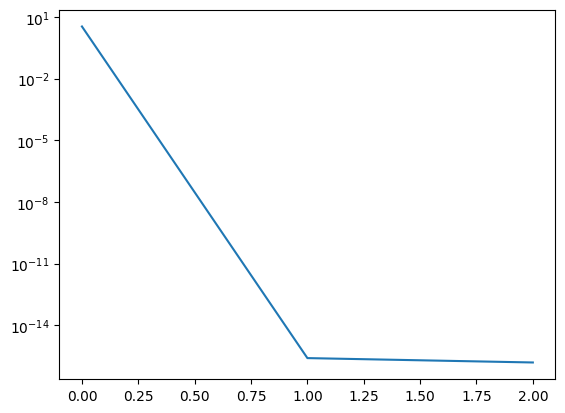

In [130]:
Cm = ct.ctrb(A, B)
U, sigma, Vt = svd(Cm)
sigma
plt.semilogy(sigma)
#sustav ocito nije upravljiv jer rang 1 umjesto 3

In [166]:
#uvjeti
x0 = [0, 1, 0]
u0 = np.array([[1, 2] for i in range(100)])
tt = np.arange(0, 100, 1)

In [167]:
T, yout = ct.forced_response(sys, T = tt, U = u, X0 = x0)

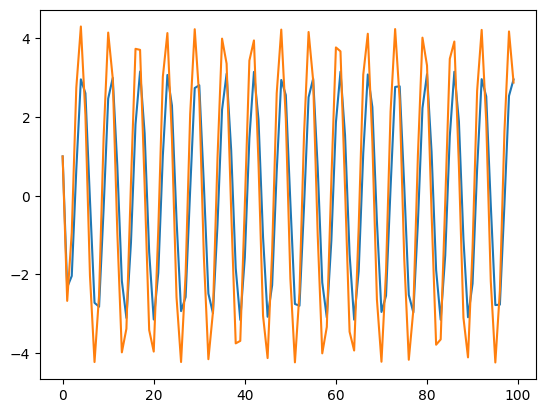

In [168]:
plt.plot(T.T,yout.T)

In [169]:
#Sustav
A = Matrix([[-1, 0, 1],
            [3, -2, 0],
            [0, 0, 0]])
B = Matrix([[-1],
            [0],
            [1]])
C = Matrix([[-1, 0, 1]])
D = 0

In [170]:
#a
zad5_sys = ct.ss(A, B, C, D)
zad5_tf = ct.tf(zad5_sys)
zad5_tf

TransferFunction(array([2., 4., 0.]), array([1., 3., 2., 0.]))

In [173]:
#b
P, J = A.jordan_form()
J
A.eigenvals()
#sustav je stabilan vidi se iz nultocki vektora ili iz Jordanove forme matrice A

{0: 1, -1: 1, -2: 1}

In [176]:
#c
Cm = ct.ctrb(A, B)
U, sigma, Vt = svd(Cm)
sigma
#sustav je upravljiv jer je rang kontrolne matrice 3 = n.

array([12.60952987,  1.84404826,  0.77410759])

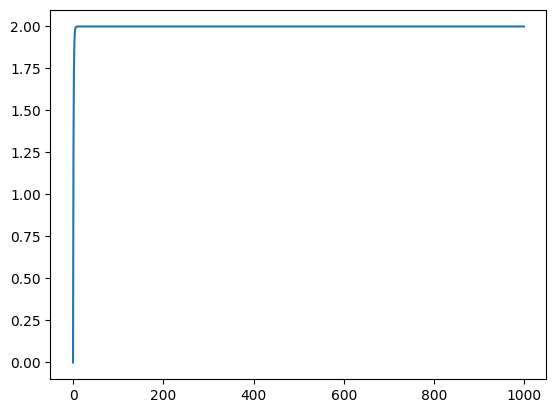

In [180]:
#uvjeti
x0 = [1, 1, 1]
u = 1
tt = np.arange(0, 1000, 1)

#izracun
T, yout = ct.forced_response(zad5_sys, tt, u, x0)

#plot
plt.plot(T.T, yout.T)

#graf potvrdjuje da je sustav stabilan nakon nekog vremena jednostavno se stabilizira
#postaje graf y = 2

In [2]:
num = [[[4., -10.], [0., 3.]], 
       [[0., 1.], [1., 1.]] ]
den = [[[0., 2., 1.], [0., 1., 2.]], 
       [[2., 5., 2.], [1., 4., 4.]]]
sys_tf = tf(num, den)
# print(sys_tf)
sys_tf

TransferFunction([[array([  4., -10.]), array([3.])], [array([1.]), array([1., 1.])]], [[array([2., 1.]), array([1., 2.])], [array([2., 5., 2.]), array([1., 4., 4.])]])

In [3]:
sys = ct.ss(sys_tf)
# print(sys)
sys

TypeError: No support for MIMO without slycot